In [164]:
#Importing the Libraries
from os import minor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import math

In [ ]:
# Getting the data sets
apple_df = pd.read_csv('../CSV/AAPL.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)
microsoft_df = pd.read_csv('../CSV/MSFT_kaggle.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)


Apple                 Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100600  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095352  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088353  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090540   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093165   73449600 
<<shape>> (10272, 6)
Microsoft                 Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063628   308160000
1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064725   133171200
1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063079    67766400
1986-03

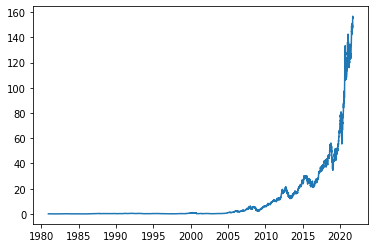

In [211]:

#Get The Dataset
# df = pd.read_csv('../CSV/MSFT_kaggle.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)
# df = pd.read_csv('../CSV/MSFT_short.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)
df = pd.read_csv('../CSV/AAPL.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)

apple_df = pd.read_csv('../CSV/AAPL.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)
microsoft_df = pd.read_csv('../CSV/MSFT_kaggle.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)

#showing what the data looks like
print('Apple', apple_df.head(), '\n<<shape>>', apple_df.shape)
print('Microsoft', microsoft_df.head(), '\n<<shape>>', microsoft_df.shape)


#Print the shape of Dataframe and Check for Null values
# print('Df Shape: ', df.shape)
# print('Null values present: ', df.isnull().values.any())

#plot the true adj close value
# df['Adj Close'].plot()
# plt.show()
plt.plot(apple_df['Adj Close'], label='Apple Adj Close')
# plt.plot(microsoft_df['Adj Close'], label='Microsoft Adj Close')
plt.show()
# apple_df['Adj Close'].plot(label='Apple Adj Close')
# microsoft_df['Adj Close'].plot(label='Microsoft Adj Close')

#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])

#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
# print(feature_transform.head())


#splitting to Training set and Test Set
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
  # X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index) + len(test_index))]
  X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): ]
  y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index) + len(test_index))].values.ravel()

#process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


#Building the LSTM Model
lstm = Sequential()
# lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="selu", return_sequences=False))
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="elu", return_sequences=False))
# lstm.add(LSTM(32, activation="tanh", return_sequences=False))
lstm.add(Dense(32, activation='elu'))
lstm.add(Dense(2, activation='elu'))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
# plot_model(lstm, show_shapes=True, show_layer_names=True)

In [180]:
#early stopping
earlyStop = EarlyStopping(
  monitor='loss',
  min_delta=0.01,
  patience=10,
  mode='min',
  verbose=1,
  restore_best_weights=True
)

In [184]:
#Model Training
# history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)
history=lstm.fit(X_train, y_train, epochs=300, batch_size=8, verbose=1, shuffle=False, callbacks=[earlyStop])


Epoch 1/300
1168/1168 [==============================] - 2s 1ms/step - loss: 0.4590
Epoch 2/300
1168/1168 [==============================] - 1s 1ms/step - loss: 8.5442
Epoch 3/300
1168/1168 [==============================] - 1s 1ms/step - loss: 2.6068
Epoch 4/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.4423
Epoch 5/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0281
Epoch 6/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0192
Epoch 7/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0168
Epoch 8/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0131
Epoch 9/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 10/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 11/300
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 12/300
1168/1168 [==============================] - 1s 1ms/step - lo

In [185]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

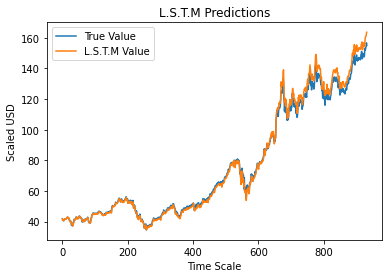

In [213]:
#Predicted vs True Adj Close Value – LSTM
# plt.plot(y_test, label='True Value')
# plt.plot(y_pred, label='LSTM Value')
# start = 530
# end = 580
start = 0
end = len(y_pred)

plt.plot(y_test[start:end], label='True Value')
plt.plot(y_pred[start:end], label='L.S.T.M Value')
plt.title("L.S.T.M Predictions")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()

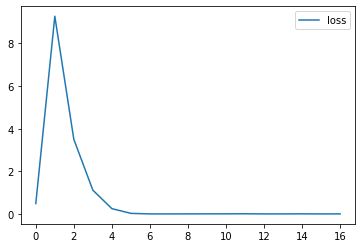

In [177]:
pd.DataFrame(history.history).plot()
plt.show()